In [1]:
import os
import sys
def getRepoPath():
    cwd = os.getcwd()
    delimiter = "\\" if "\\" in cwd else "/"
    repoPath = delimiter.join(cwd.split(delimiter)[:cwd.split(delimiter).index("dataImport")]) + delimiter
    return repoPath
repoPath = getRepoPath()
sys.path.append(repoPath + 'dataImport/')
from utils import workingDataPath, getWorkingHypnoDfParquet, regroupHypno
import pandas as pd

appleHypnoDF = getWorkingHypnoDfParquet("apple").drop(["creationDate", "sourceVersion"], axis=1)
appleHypnoDF['startDate'] = appleHypnoDF.index
appleHypnoDF

,endDate,value,startDate
startDate,,,
2022-10-01 00:42:59-07:00,2022-10-01 01:13:59-07:00,1,2022-10-01 00:42:59-07:00
2022-10-01 01:13:59-07:00,2022-10-01 01:29:59-07:00,2,2022-10-01 01:13:59-07:00
2022-10-01 01:29:59-07:00,2022-10-01 01:30:29-07:00,0,2022-10-01 01:29:59-07:00
2022-10-01 01:30:29-07:00,2022-10-01 01:43:29-07:00,1,2022-10-01 01:30:29-07:00
2022-10-01 01:43:29-07:00,2022-10-01 01:50:59-07:00,3,2022-10-01 01:43:29-07:00
...,...,...,...
2024-07-16 07:14:28-07:00,2024-07-16 07:14:58-07:00,0,2024-07-16 07:14:28-07:00
2024-07-16 07:14:58-07:00,2024-07-16 07:34:58-07:00,1,2024-07-16 07:14:58-07:00
2024-07-16 07:34:58-07:00,2024-07-16 07:36:28-07:00,0,2024-07-16 07:34:58-07:00


In [2]:
groupedByNoData = regroupHypno(appleHypnoDF, [-1])
noDataTimes = groupedByNoData[groupedByNoData['value'] == 1]
dataTimes = groupedByNoData[groupedByNoData['value'] == 0]

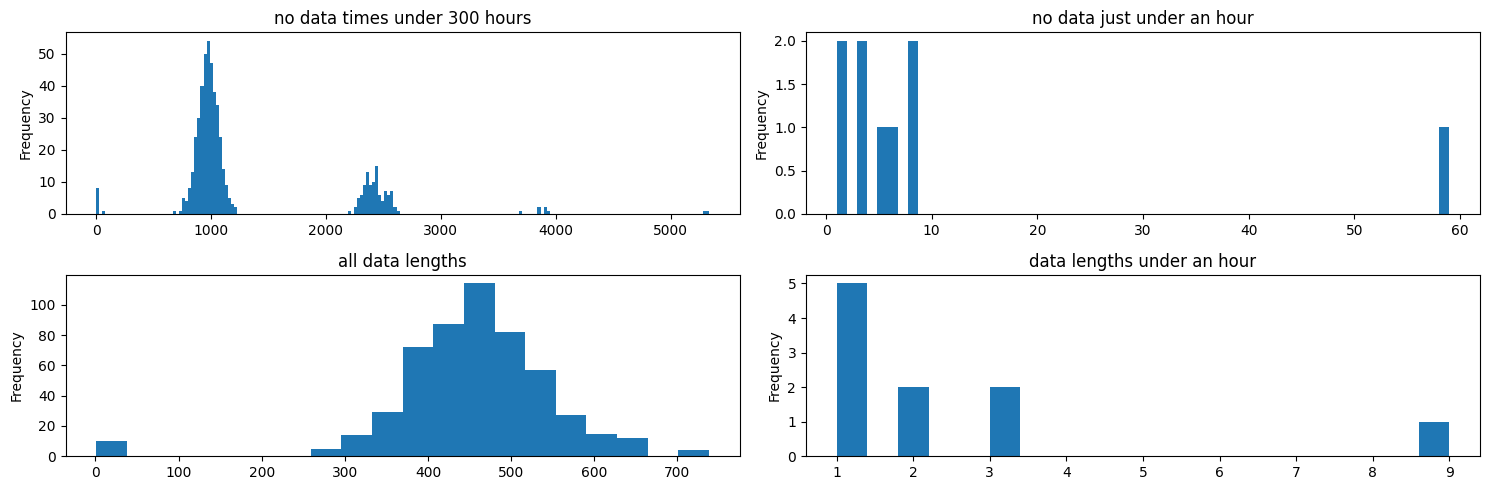

In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(15, 5))

noDataTimes[noDataTimes['durationInMin'] < 18000].durationInMin.plot.hist(bins=200, ax=axs[0,0])
axs[0,0].set_title("no data times under 300 hours")

noDataTimes[noDataTimes['durationInMin'] < 60].durationInMin.plot.hist(bins=60, ax=axs[0,1])
axs[0,1].set_title('no data just under an hour')

dataTimes[dataTimes['durationInMin'] < 10000].durationInMin.plot.hist(bins=20, ax=axs[1,0])
axs[1,0].set_title('all data lengths')

dataTimes[dataTimes['durationInMin'] < 60].durationInMin.plot.hist(bins=20, ax=axs[1,1])
axs[1,1].set_title('data lengths under an hour')

plt.tight_layout()
plt.show()

In [4]:
groupedByAsleep = regroupHypno(appleHypnoDF, [1,2,3])
awakeOrNoDataTimes = groupedByAsleep[groupedByAsleep['value'] == 0]
sleepTimes = groupedByAsleep[groupedByAsleep['value'] == 1]

<AxesSubplot:>

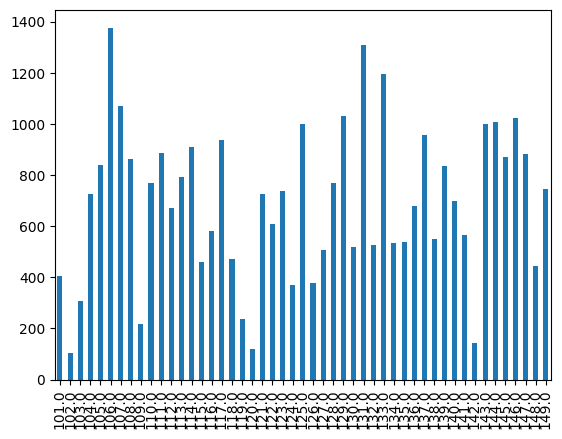

In [5]:
overallDurationList = (sleepTimes.durationInMin.value_counts().index *
                       sleepTimes.durationInMin.value_counts().values
                       ).to_list()
sleepTimesOverallDurations = pd.Series(index=sleepTimes.durationInMin.value_counts().index, 
                                       data=overallDurationList)

sleepTimesOverallDurations = sleepTimesOverallDurations.sort_index()

sleepTimesOverallDurations[(100 < sleepTimesOverallDurations.index) &
                           (sleepTimesOverallDurations.index < 150)].plot.bar()

<AxesSubplot:>

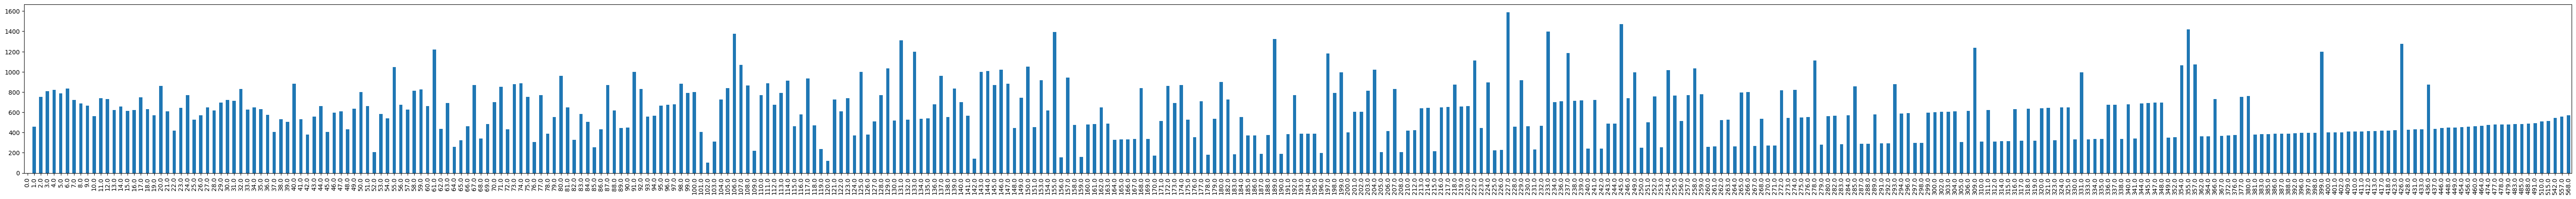

In [10]:
sleepTimesOverallDurations.plot.bar(figsize=(75, 5))

<AxesSubplot:ylabel='Frequency'>

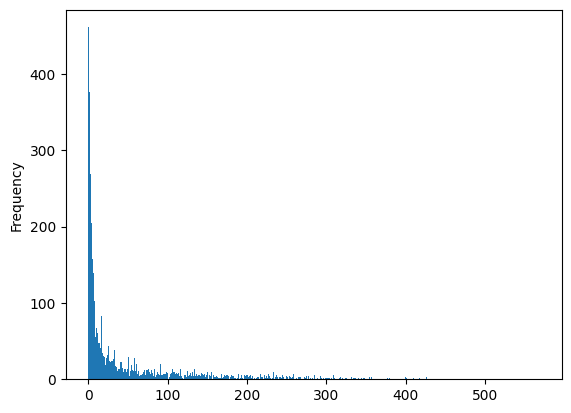

In [7]:
sleepTimes.durationInMin.plot.hist(bins=500)

<AxesSubplot:ylabel='Frequency'>

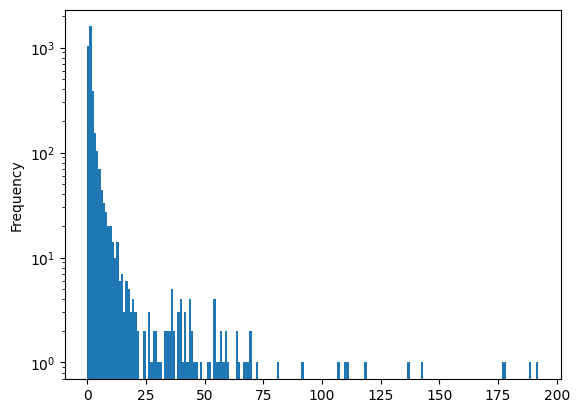

In [9]:
labeledAwakePeriods = appleHypnoDF[appleHypnoDF['value'] == 0]
labeledAwakeDuration = (labeledAwakePeriods['endDate'] - labeledAwakePeriods['startDate']).astype('timedelta64[m]')
labeledAwakeDuration[labeledAwakeDuration<1000].plot.hist(bins=200,log=True)